In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from scipy.stats import ttest_ind, mannwhitneyu


Classification of Comments: Climate Skeptics vs Climate Science

# Part 1

In [28]:
df = pkl.load(open('project8.pkl', 'rb'))
df.shape

(2027, 19)

In [29]:
df.head()

,Unnamed: 0,post_id,self_text,user_is_verified,controversiality,ups,downs,subreddit,score,user_awardee_karma,user_awarder_karma,user_total_karma,user_comment_karma,user_link_karma,post_score,post_upvote_ratio,post_thumbs_up,post_total_awards_ratio,post_created_time
0,1979,9grgvl,"Yes, modeling anything with less resolution i...",True True True True True True True,0.142857,2.857143,0,climate_science,2.857143,8.571429,0.000000,11034.571429,10438.285714,587.714286,33,0.97,33,0,2018-09-18 03:59:40
1,503,1anritd,"Thing is, there's no official paper that desc...",True True True True True True True,0.000000,9.000000,0,climateskeptics,9.000000,748.142857,9.571429,91926.000000,42031.571429,49136.714286,67,0.94,67,0,2024-02-10 21:56:09
2,1387,16xyvqf,I read that article a month ago. Not sure wh...,True,0.000000,2.000000,0,climateskeptics,2.000000,315.000000,0.000000,37103.000000,36305.000000,483.000000,7,0.73,7,0,2023-10-02 14:58:12
3,918,18ii60q,&gt; Dr. Paul Pettré provides a damning critq...,True,0.000000,3.000000,0,climateskeptics,3.000000,1683.000000,20.000000,164653.000000,63989.000000,98961.000000,12,0.93,12,0,2023-12-14 20:42:33
4,1375,16zuc0a,This was a really good interview. She really ...,False,0.000000,3.000000,0,climateskeptics,3.000000,1703.000000,114.000000,1817.000000,0.000000,0.000000,27,0.97,27,0,2023-10-04 18:12:08


In [30]:
print("size of the dataset: ", df.shape)
print("columns in the dataset: ", df.columns)
print("data types of the columns: ", df.dtypes)

size of the dataset:  (2027, 19)
columns in the dataset:  Index(['Unnamed: 0', 'post_id', 'self_text', 'user_is_verified',
       'controversiality', 'ups', 'downs', 'subreddit', 'score',
       'user_awardee_karma', 'user_awarder_karma', 'user_total_karma',
       'user_comment_karma', 'user_link_karma', 'post_score',
       'post_upvote_ratio', 'post_thumbs_up', 'post_total_awards_ratio',
       'post_created_time'],
      dtype='object')
data types of the columns:  Unnamed: 0                   int64
post_id                     object
self_text                   object
user_is_verified            object
controversiality           float64
ups                        float64
downs                        int64
subreddit                   object
score                      float64
user_awardee_karma         float64
user_awarder_karma         float64
user_total_karma           float64
user_comment_karma         float64
user_link_karma            float64
post_score                   int64
po

In [31]:
grouped = df.groupby("subreddit")
grouped.size()

subreddit
climate_science     442
climateskeptics    1585
dtype: int64

In [32]:
climate_science_group = grouped.get_group("climate_science")
climateskeptics_group = grouped.get_group("climateskeptics")

print("size of the climate_science group: ", climate_science_group.shape)
print("size of the climateskeptics group: ", climateskeptics_group.shape)

size of the climate_science group:  (442, 19)
size of the climateskeptics group:  (1585, 19)


In [33]:
quantative_features = [x for x in df.columns if df[x].dtype != 'object']
quantative_features.remove("Unnamed: 0")
print("quantative features: ", quantative_features)
print(len(quantative_features))

quantative features:  ['controversiality', 'ups', 'downs', 'score', 'user_awardee_karma', 'user_awarder_karma', 'user_total_karma', 'user_comment_karma', 'user_link_karma', 'post_score', 'post_upvote_ratio', 'post_thumbs_up', 'post_total_awards_ratio']
13


In [34]:
quants = ["score", "controversiality", "ups", "downs", "user_awardee_karma", "user_awarder_karma", "user_total_karma", "user_comment_karma", "user_link_karma"]
statistics = grouped[quants].agg(['mean', 'var']).round(3)

In [35]:
#output the statistics to a html file
table = statistics.to_html()
with open('statistics.html', 'w') as f:
    f.write(table)

statistics

score         controversiality           ups         downs  \
                  mean     var             mean    var   mean     var  mean   
subreddit                                                                     
climate_science  3.688   8.019            0.006  0.002  3.688   8.019   0.0   
climateskeptics  4.843  11.684            0.006  0.001  4.843  11.684   0.0   

                     user_awardee_karma              user_awarder_karma  \
                 var               mean          var               mean   
subreddit                                                                 
climate_science  0.0            708.492  5570532.454            168.478   
climateskeptics  0.0            550.925   246736.288            128.172   

                            user_total_karma               user_comment_karma  \
                        var             mean           var               mean   
subreddit                                                                       
climate_science  422352.671        82912.067  1.219727e+11          40582.636   
climateskeptics  339814.415        64198.231  5.079500e+09          37095.989   

                              user_link_karma                
                          var            mean           var  
subreddit                                                    
climate_science  2.719792e+10       41452.461  4.002539e+10  
climateskeptics  1.379226e+09       26423.145  1.503040e+09

In [36]:
statistics.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr>\n      <th></th>\n      <th colspan="2" halign="left">score</th>\n      <th colspan="2" halign="left">controversiality</th>\n      <th colspan="2" halign="left">ups</th>\n      <th colspan="2" halign="left">downs</th>\n      <th colspan="2" halign="left">user_awardee_karma</th>\n      <th colspan="2" halign="left">user_awarder_karma</th>\n      <th colspan="2" halign="left">user_total_karma</th>\n      <th colspan="2" halign="left">user_comment_karma</th>\n      <th colspan="2" halign="left">user_link_karma</th>\n    </tr>\n    <tr>\n      <th></th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n      <th>mean</th>\n      <th>var</th>\n    </tr>\n    

# Part 2

In [37]:
#subreddits_to_compare = ['climate_science', 'climateskeptics']
#filtered_df = df[df['subreddit'].isin(subreddits_to_compare)]

df_sci = grouped.get_group('climate_science')
df_skep = grouped.get_group('climateskeptics')



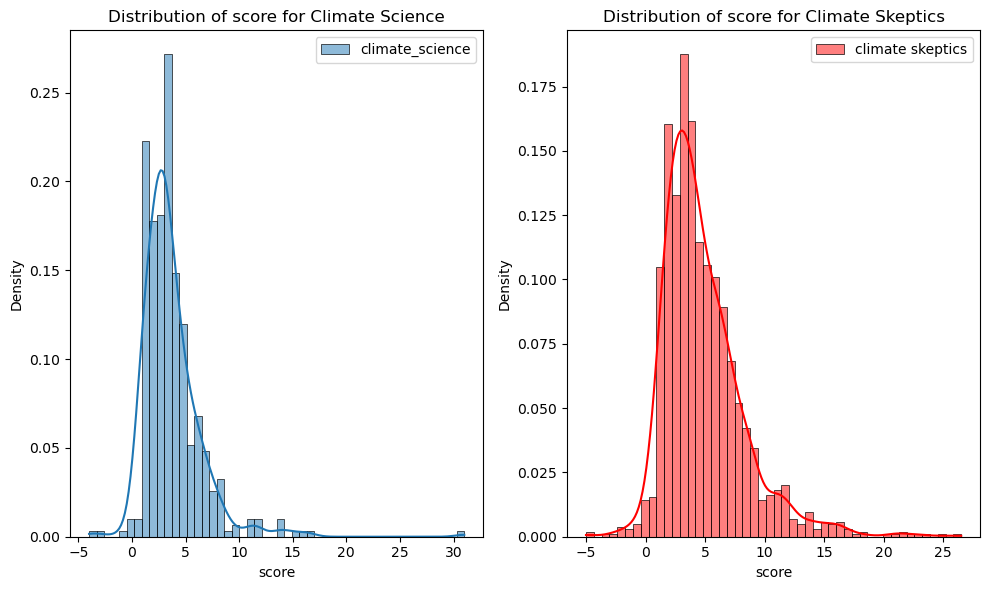

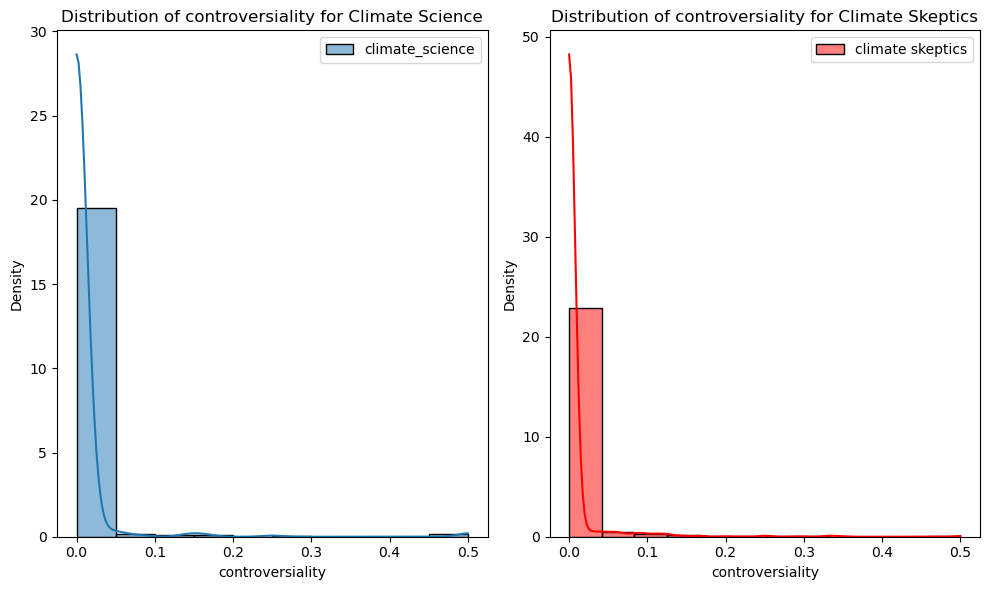

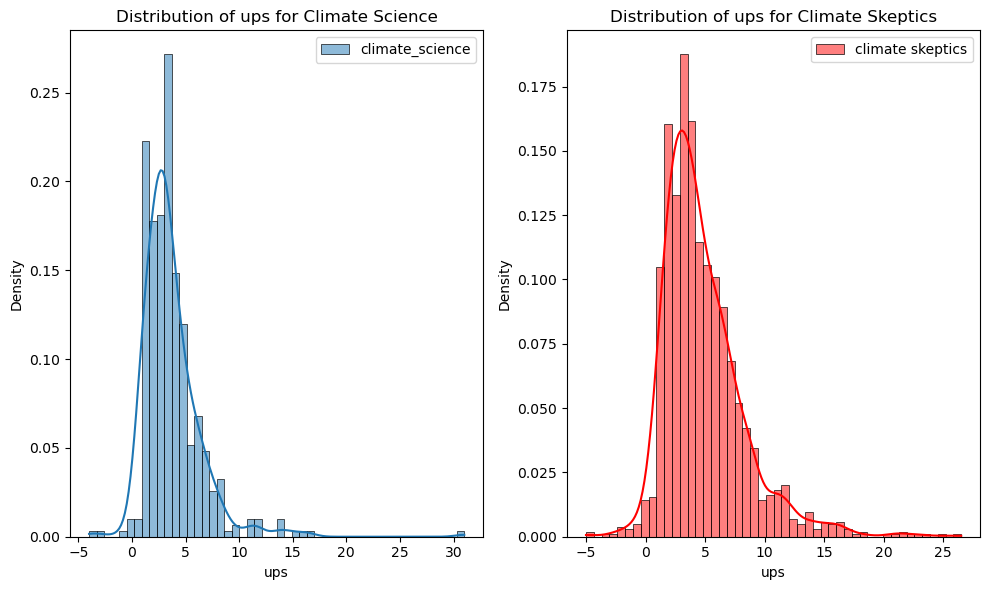

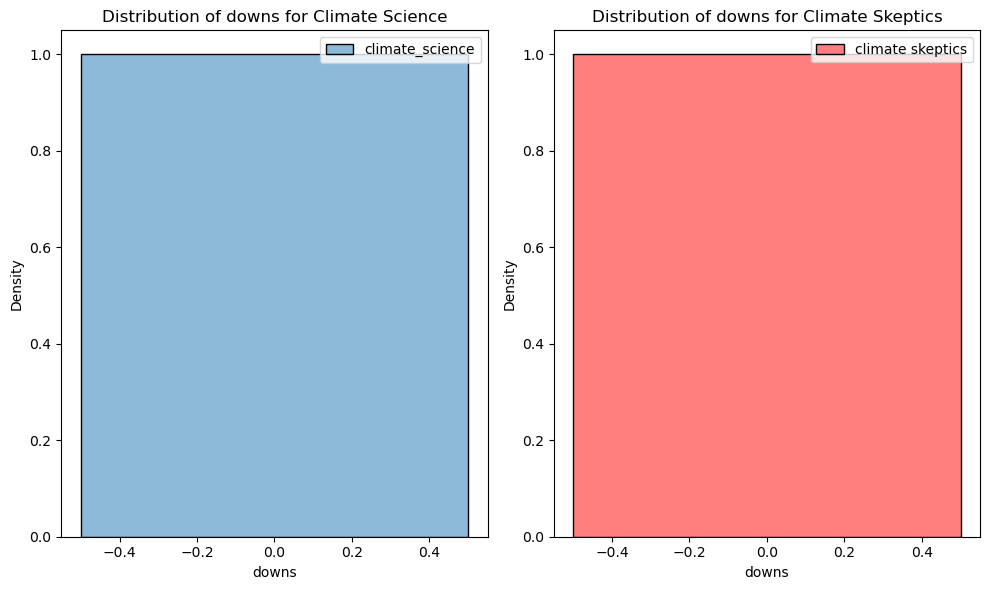

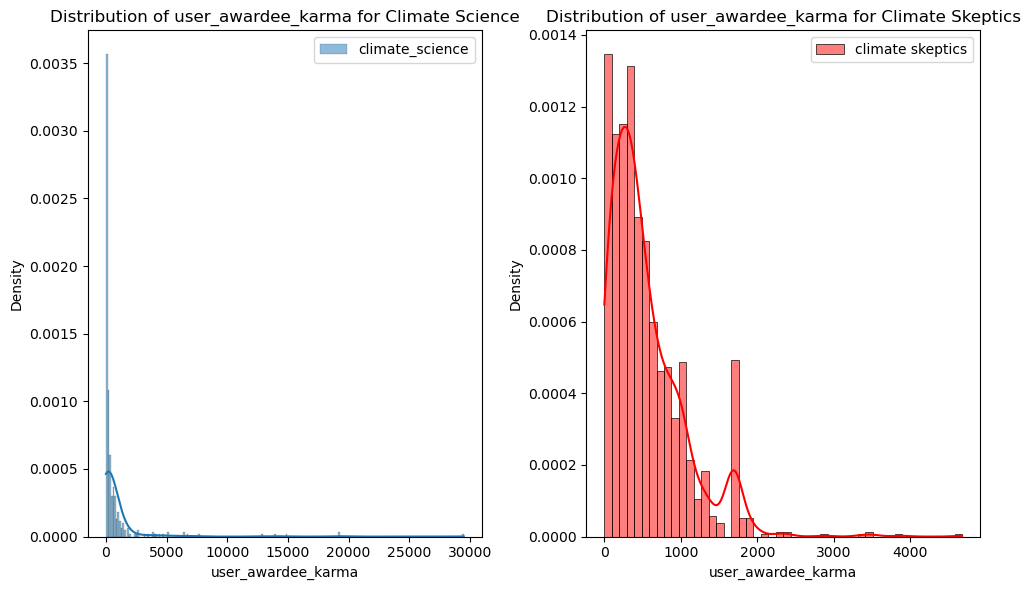

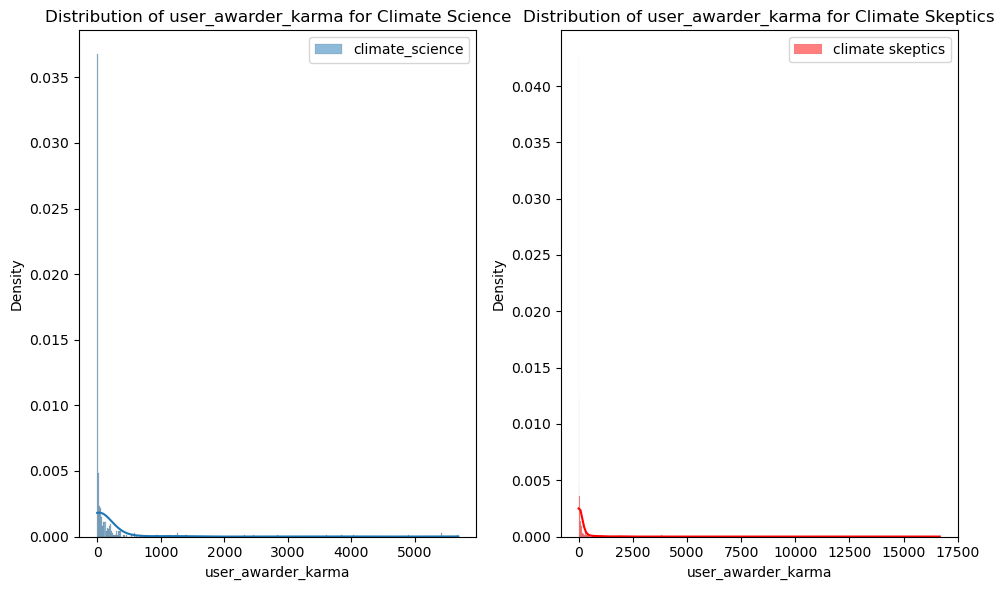

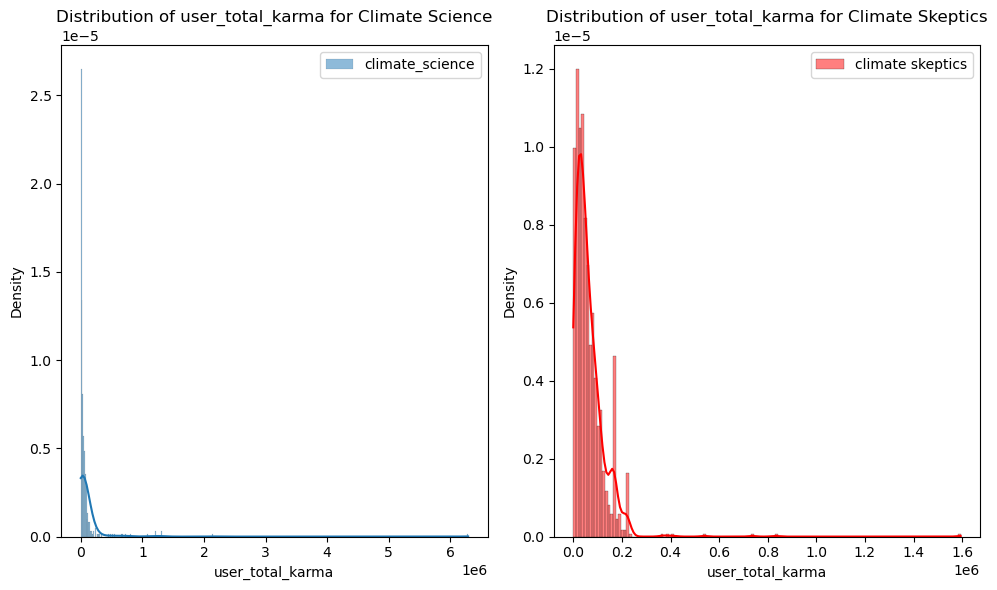

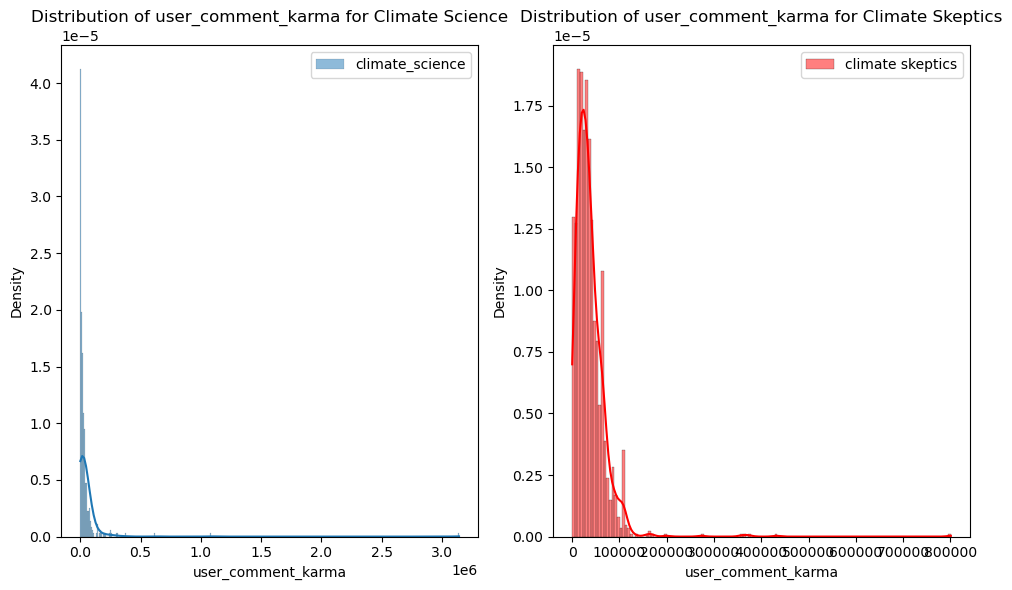

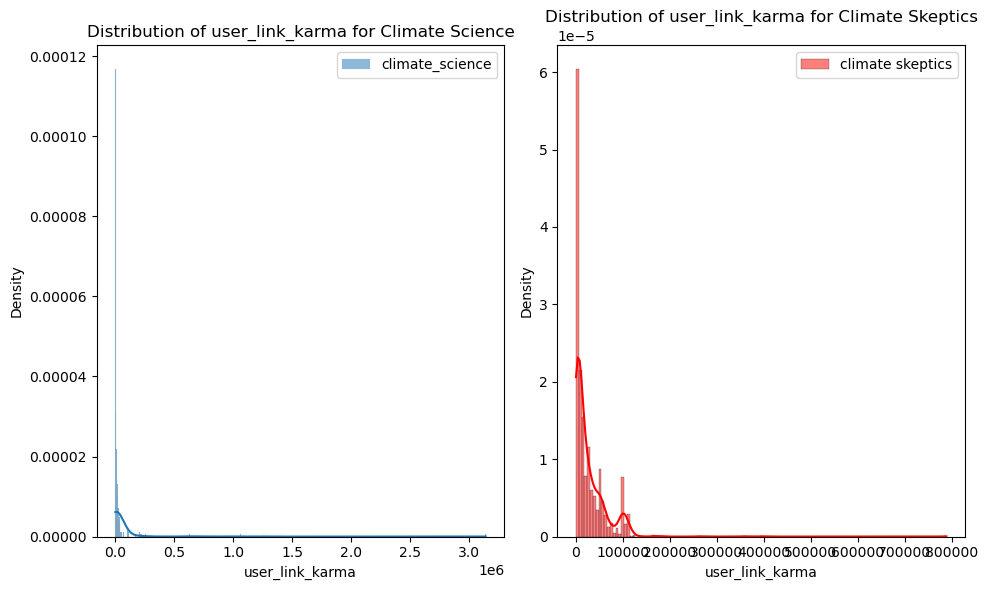

In [38]:
# Plotting distributions for each feature
for feature in quants:
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.histplot(data=df_sci, x=feature, kde=True, stat="density", ax=ax[0], label='climate_science')
    sns.histplot(data=df_skep, x=feature, kde=True, stat="density", ax=ax[1], label='climate skeptics', color='red')
    ax[0].set_title(f'Distribution of {feature} for Climate Science')
    ax[1].set_title(f'Distribution of {feature} for Climate Skeptics')
    ax[0].set_xlabel(feature)
    ax[1].set_xlabel(feature)
    ax[0].set_ylabel('Density')
    ax[1].set_ylabel('Density')
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()

# Part 3

In [39]:
#performing t-test
ttest_results = {}

for feature in quants:
    df_sci[feature].dropna()
    df_skep[feature].dropna()
    ttest = ttest_ind(df_sci[feature], df_skep[feature], equal_var=False)
    ttest_results[feature] = ttest

ttest_results

{'score': TtestResult(statistic=-7.231013600960234, pvalue=1.0853354570110612e-12, df=833.8520308258534),
 'controversiality': TtestResult(statistic=0.009980559292943914, pvalue=0.9920402009269687, df=584.9457797191046),
 'ups': TtestResult(statistic=-7.231013600960234, pvalue=1.0853354570110612e-12, df=833.8520308258534),
 'downs': TtestResult(statistic=nan, pvalue=nan, df=1.0),
 'user_awardee_karma': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'user_awarder_karma': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'user_total_karma': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'user_comment_karma': TtestResult(statistic=nan, pvalue=nan, df=nan),
 'user_link_karma': TtestResult(statistic=nan, pvalue=nan, df=nan)}

In [40]:
for feature, t_result in ttest_results.items():
    if t_result[1] < 0.05:
        print(f"Feature {feature} has a significant difference between the two groups")

Feature score has a significant difference between the two groups
Feature ups has a significant difference between the two groups


In [41]:
mannwhitneyu_results = {}

for feature in quants:
    df_sci[feature].dropna()
    df_skep[feature].dropna()
    mwu = mannwhitneyu(df_sci[feature], df_skep[feature])
    mannwhitneyu_results[feature] = mwu

mannwhitneyu_results

{'score': MannwhitneyuResult(statistic=269330.0, pvalue=9.815339124051066e-14),
 'controversiality': MannwhitneyuResult(statistic=341908.0, pvalue=0.051861227376005244),
 'ups': MannwhitneyuResult(statistic=269330.0, pvalue=9.815339124051066e-14),
 'downs': MannwhitneyuResult(statistic=350285.0, pvalue=1.0),
 'user_awardee_karma': MannwhitneyuResult(statistic=nan, pvalue=nan),
 'user_awarder_karma': MannwhitneyuResult(statistic=nan, pvalue=nan),
 'user_total_karma': MannwhitneyuResult(statistic=nan, pvalue=nan),
 'user_comment_karma': MannwhitneyuResult(statistic=nan, pvalue=nan),
 'user_link_karma': MannwhitneyuResult(statistic=nan, pvalue=nan)}

In [42]:
for feature, mwu_result in mannwhitneyu_results.items():
    if mwu_result[1] < 0.05:
        print(f"Feature {feature} has a significant difference between the two groups")
        

Feature score has a significant difference between the two groups
Feature ups has a significant difference between the two groups


# Part 4

In [43]:
df_sci["post_created_time"] = pd.to_datetime(df_sci["post_created_time"])
df_skep["post_created_time"] = pd.to_datetime(df_skep["post_created_time"])

df_sci["post_created_time"].head()

C:\Users\randy\AppData\Local\Temp\ipykernel_15068\955664946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sci["post_created_time"] = pd.to_datetime(df_sci["post_created_time"])
C:\Users\randy\AppData\Local\Temp\ipykernel_15068\955664946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skep["post_created_time"] = pd.to_datetime(df_skep["post_created_time"])


0    2018-09-18 03:59:40
16   2019-12-31 22:00:25
18   2019-07-04 22:47:26
21   2020-02-12 04:31:10
23   2020-01-06 14:35:49
Name: post_created_time, dtype: datetime64[ns]

In [44]:
dt_features = ["post_day", "post_month", "post_year", "post_day_of_week", "post_day_of_year", "post_hour"]

In [45]:
df_sci["post_day"] = df_sci["post_created_time"].dt.day
df_sci["post_month"] = df_sci["post_created_time"].dt.month
df_sci["post_year"] = df_sci["post_created_time"].dt.year
df_sci["post_day_of_week"] = df_sci["post_created_time"].dt.dayofweek
df_sci["post_day_of_year"] = df_sci["post_created_time"].dt.dayofyear
df_sci["post_hour"] = df_sci["post_created_time"].dt.hour

df_skep["post_day"] = df_skep["post_created_time"].dt.day
df_skep["post_month"] = df_skep["post_created_time"].dt.month
df_skep["post_year"] = df_skep["post_created_time"].dt.year
df_skep["post_day_of_week"] = df_skep["post_created_time"].dt.dayofweek
df_skep["post_day_of_year"] = df_skep["post_created_time"].dt.dayofyear
df_skep["post_hour"] = df_skep["post_created_time"].dt.hour

df_sci[dt_features].head()

# These may not be useful for the analysis... Keeping them for now

C:\Users\randy\AppData\Local\Temp\ipykernel_15068\904047494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sci["post_day"] = df_sci["post_created_time"].dt.day
C:\Users\randy\AppData\Local\Temp\ipykernel_15068\904047494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sci["post_month"] = df_sci["post_created_time"].dt.month
C:\Users\randy\AppData\Local\Temp\ipykernel_15068\904047494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,post_day,post_month,post_year,post_day_of_week,post_day_of_year,post_hour
0,18,9,2018,1,261,3
16,31,12,2019,1,365,22
18,4,7,2019,3,185,22
21,12,2,2020,2,43,4
23,6,1,2020,0,6,14


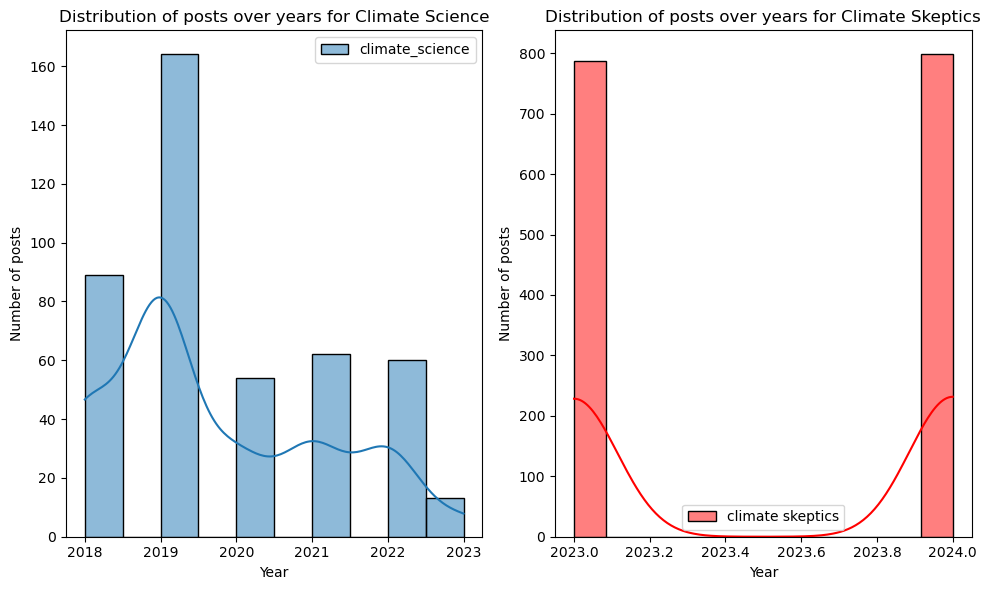

In [46]:
# order both dataframes by post_created_time
df_sci = df_sci.sort_values(by='post_created_time')
df_skep = df_skep.sort_values(by='post_created_time')

# Plotting the distribution of posts over time 
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(data=df_sci, x='post_year', kde=True, stat="count", ax=ax[0], label='climate_science')
sns.histplot(data=df_skep, x='post_year', kde=True, stat="count", ax=ax[1], label='climate skeptics', color='red')
ax[0].set_title(f'Distribution of posts over years for Climate Science')
ax[1].set_title(f'Distribution of posts over years for Climate Skeptics')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Number of posts')
ax[1].set_ylabel('Number of posts')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

In [47]:
day_0 = min(df_sci["post_created_time"].min(), df_skep["post_created_time"].min())

df_sci["number_of_days_since_start"] = (df_sci["post_created_time"] - day_0).dt.days + (df_sci["post_created_time"].dt.hour / 24)
df_skep["number_of_days_since_start"] = (df_skep["post_created_time"] - day_0).dt.days + (df_skep["post_created_time"].dt.hour / 24)

df_sci[["number_of_days_since_start", "post_created_time"]].head()


,number_of_days_since_start,post_created_time
1420,0.916667,2018-05-31 22:51:17
1463,0.708333,2018-06-01 17:09:16
1748,4.708333,2018-06-05 17:06:15
231,13.500000,2018-06-14 12:24:44
213,13.625000,2018-06-14 15:39:42


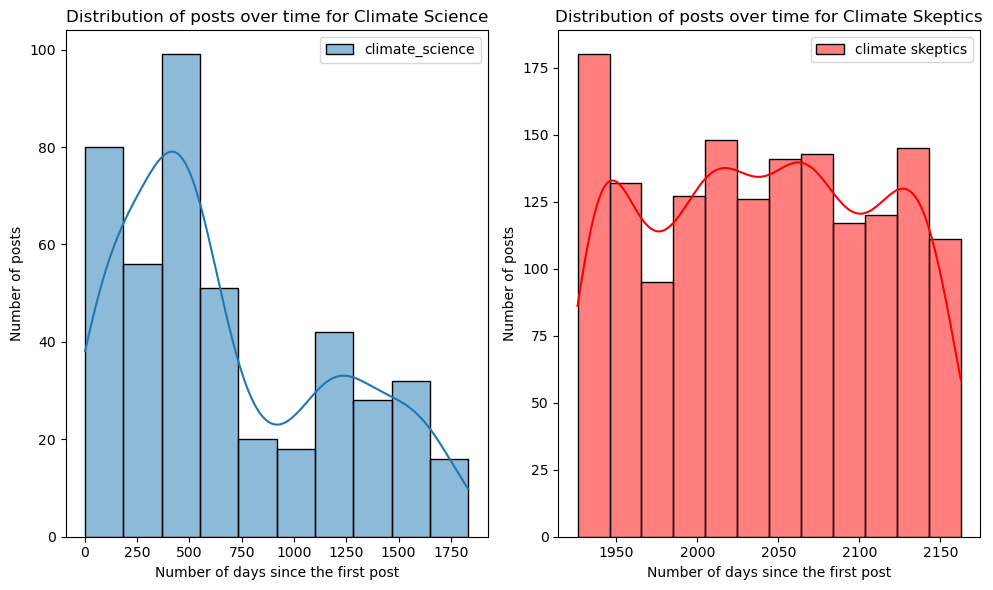

In [48]:
#plot the distribution of posts over time
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(data=df_sci, x='number_of_days_since_start', kde=True, stat="count", ax=ax[0], label='climate_science')
sns.histplot(data=df_skep, x='number_of_days_since_start', kde=True, stat="count", ax=ax[1], label='climate skeptics', color='red')
ax[0].set_title(f'Distribution of posts over time for Climate Science')
ax[1].set_title(f'Distribution of posts over time for Climate Skeptics')
ax[0].set_xlabel('Number of days since the first post')
ax[1].set_xlabel('Number of days since the first post')
ax[0].set_ylabel('Number of posts')
ax[1].set_ylabel('Number of posts')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()


In [49]:
#t-test for the number of days since the first post

ttest = ttest_ind(df_sci["number_of_days_since_start"], df_skep["number_of_days_since_start"], equal_var=False)
ttest


TtestResult(statistic=-56.485329701389, pvalue=3.050841842398806e-205, df=445.57712819630706)